In [2]:
%pip install datatile --quiet


[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datatile.summary.df import DataFrameSummary
import seaborn as sns

In [4]:
df_raw_data = pd.read_csv("Dataset/train.csv")

In [5]:
df_raw_data.head(10)
df_raw_data.shape

(1460, 81)

In [6]:
df_raw_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [7]:
df_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
df_raw_data_1 = df_raw_data.loc[:, df_raw_data.columns != "MSZoning"]

In [9]:
summary = df_raw_data.describe()
print(summary)
summary.to_csv("OUTPUT_FILES/Summary.csv")

                Id   MSSubClass  LotFrontage        LotArea  OverallQual   
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000  \
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...   
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...  \
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [10]:
import pandas as pd

def dataframe_summary(df):
    summary = pd.DataFrame(columns=['Column', 'Data Type', 'Unique', 'Min', 'Max', 'Mean', 'Median', 'Missing'])
    
    for column in df.columns:
        data_type = df[column].dtype
        
        if pd.api.types.is_numeric_dtype(data_type):
            summary.loc[len(summary)] = [
                column,
                data_type,
                df[column].nunique(),
                df[column].min(),
                df[column].max(),
                df[column].mean(),
                df[column].median(),
                df[column].isnull().sum()
            ]
        else:
            summary.loc[len(summary)] = [
                column,
                data_type,
                df[column].nunique(),
                None,
                None,
                None,
                None,
                df[column].isnull().sum()
            ]
    
    return summary

# Assuming you have a DataFrame called df_raw_data
summary = dataframe_summary(df_raw_data)
summary.to_csv("OUTPUT_FILES/Summary.csv")

In [11]:
def columns_with_missing_values(df, threshold=0.5):
    missing_percentages = df.isnull().mean()
    columns_with_missing = missing_percentages[missing_percentages > threshold].index.tolist()
    return columns_with_missing

In [12]:
remove_columns = columns_with_missing_values(df_raw_data, threshold=0.5)
print(remove_columns)

['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']


In [13]:
df_raw_data = df_raw_data.loc[:, ~df_raw_data.columns.isin(remove_columns)]

In [14]:
df_raw_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenP

In [15]:
df = df_raw_data

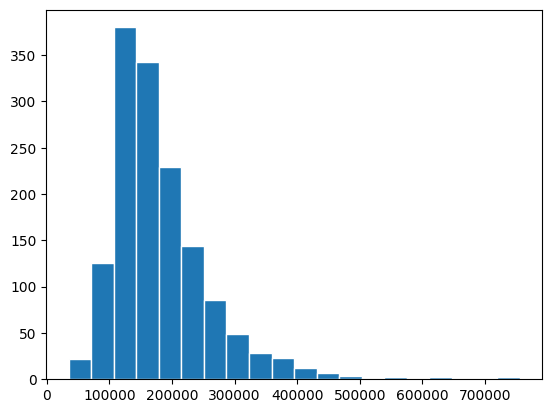

In [16]:
plt.show(plt.hist(df_raw_data['SalePrice'], bins =20, edgecolor='white'))

In [17]:
summary2 = dataframe_summary(df)

In [18]:
summary2

,Column,Data Type,Unique,Min,Max,Mean,Median,Missing
0,Id,int64,1460,1,1460,730.500000,730.5,0
1,MSSubClass,int64,15,20,190,56.897260,50.0,0
2,MSZoning,object,5,None,None,NaN,NaN,0
3,LotFrontage,float64,110,21.0,313.0,70.049958,69.0,259
4,LotArea,int64,1073,1300,215245,10516.828082,9478.5,0
...,...,...,...,...,...,...,...,...
71,MoSold,int64,12,1,12,6.321918,6.0,0
72,YrSold,int64,5,2006,2010,2007.815753,2008.0,0
73,SaleType,object,9,None,None,NaN,NaN,0
74,SaleCondition,object,6,None,None,NaN,NaN,0


In [19]:
categorical_vars = summary2[summary2["Data Type"]=="object"]["Column"]
categorical_vars = categorical_vars.tolist()
numeric_vars = summary2[summary2["Data Type"]!="object"]["Column"]
numeric_vars = numeric_vars.tolist()

In [20]:
def generate_class_table(dataframe, target_column , categorical_vars):
    class_table = pd.DataFrame(columns=['Column Name', 'Classes', 'Count', 'Percentage', 'Y Mean'])
    for column in categorical_vars:
        classes = dataframe[column].value_counts()
        total_count = classes.sum()
        percentages = (classes / total_count) * 100

        #y_counts = dataframe[dataframe[target_column] == 'Y'][column].value_counts()
        y_means = dataframe.groupby(column)[target_column].mean()
        
        for class_value, count, percentage, y_means in zip(
            classes.index, classes.values, percentages.values, y_means.values
        ):
            data = {
                'Column Name': column,
                'Classes': class_value,
                'Count': count,
                'Percentage': round(percentage, 2),
                'Y Mean': round(y_means, 2)
            }
            class_table = pd.concat([class_table,pd.DataFrame(data, index=[0])])
            class_table.reset_index(drop=True, inplace=True)

    return class_table

In [21]:
summary_1 = generate_class_table(df,"SalePrice",categorical_vars)
summary_1.to_csv("OUTPUT_FILES/categorical_class_means.csv")
summary_1

,Column Name,Classes,Count,Percentage,Y Mean
0,MSZoning,RL,1151,78.84,74528.00
1,MSZoning,RM,218,14.93,214014.06
2,MSZoning,FV,65,4.45,131558.38
3,MSZoning,RH,16,1.10,191004.99
4,MSZoning,C (all),10,0.68,126316.83
...,...,...,...,...,...
230,SaleCondition,Partial,125,8.56,104125.00
231,SaleCondition,Abnorml,101,6.92,167377.42
232,SaleCondition,Family,20,1.37,149600.00
233,SaleCondition,Alloca,12,0.82,175202.22


In [22]:
categorical_vars

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [23]:
categorical_vars_selected = ["MSZoning",
"Street",
"LotShape",
"LandContour",
"LotConfig",
"Neighborhood",
"Condition1",
"BldgType",
"HouseStyle",
"RoofStyle",
"Exterior1st",
"Exterior2nd",
"ExterQual",
"ExterCond",
"Foundation",
"BsmtQual",
"BsmtCond",
"BsmtExposure",
"BsmtFinType1",
"BsmtFinType2",
"Heating",
"HeatingQC",
"CentralAir",
"Electrical",
"KitchenQual",
"FireplaceQu",
"GarageType",
"GarageFinish",
"PavedDrive",
"SaleType"]

In [44]:
mapping_1 = {'NA':0, 'Po': 1, 'Fa': 2, 'TA': 3,'Gd': 4, 'Ex': 5, 'Av': 3, 'Mn': 2, 'No': 1}
mapping_2 = {'NA':0, 'Unf': 1, 'LwQ': 2, 'Rec': 3,'BLQ': 4, 'ALQ': 5, 'GLQ': 6}
df['ExterQual_map'] = df['ExterQual'].replace(mapping_1)
df['ExterCond_map'] = df['ExterCond'].replace(mapping_1)
df['BsmtQual_map'] = df['BsmtQual'].replace(mapping_1)
df['BsmtExposure_map'] = df['BsmtExposure'].replace(mapping_1)
df['BsmtFinType1_map'] = df['BsmtFinType1'].replace(mapping_1)
df['BsmtCond_map'] = df['BsmtCond'].replace(mapping_1)
df['BsmtExposure_map'] = df['BsmtExposure'].replace(mapping_1)

df['BsmtFinType1_map'] = df['BsmtFinType1'].replace(mapping_2)
df['BsmtFinType2_map'] = df['BsmtFinType2'].replace(mapping_2)

df['HeatingQC_map'] = df['HeatingQC'].replace(mapping_1)
df['KitchenQual_map'] = df['KitchenQual'].replace(mapping_1)
df['FireplaceQu_map'] = df['FireplaceQu'].replace(mapping_1)
df['FireplaceQu_map'] = df['FireplaceQu'].replace(mapping_1)
df['GarageQual_map'] = df['GarageQual'].replace(mapping_1)
df['GarageCond_map'] = df['GarageCond'].replace(mapping_1)
#df['PoolQC_map'] = df['Pool QC'].replace(mapping_1)



In [25]:
numeric_vars_cat = summary[(summary["Unique"]<20) & (summary["Data Type"]!="object")]["Column"]
numeric_vars_cat


1       MSSubClass
17     OverallQual
18     OverallCond
47    BsmtFullBath
48    BsmtHalfBath
49        FullBath
50        HalfBath
51    BedroomAbvGr
52    KitchenAbvGr
54    TotRmsAbvGrd
56      Fireplaces
61      GarageCars
71        PoolArea
76          MoSold
77          YrSold
Name: Column, dtype: object

In [37]:
numeric_vars = summary[(summary["Unique"]>=20) & (summary["Data Type"]!="object")]["Column"]
numeric_vars = numeric_vars.tolist()
numeric_vars.remove("Id")
numeric_vars.remove("SalePrice")
numeric_vars


['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal']

In [35]:
df_cont_var = [[num_array_data]
correlation_matrix = df_cont_var.corr()

correlation_matrix

KeyError: "None of [Index([('Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice')], dtype='object')] are in the [columns]"